In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 35.2 MB 15 kB/s 
     |████████████████████████████████| 944 kB 67.4 MB/s 
  Created wheel for matplotlib: filename=matplotlib-3.5.3-cp37-cp37m-linux_x86_64.whl size=9220494 sha256=85e9fe644d819b4dd47e8ad98fd7fd22cc66c43463a4913cc40a69c0329e17ea
  Stored in directory: /root/.cache/pip/wheels/d7/1e/f4/57de2c8d2b1e9b10f9fa9522bb5f374996561546d8e568ca6d
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
# upload the .xlsx file from local after running this cell
from google.colab import files
uploaded = files.upload()

Saving HR_Employee_Data.xlsx to HR_Employee_Data (1).xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

%matplotlib inline
%config InlineBackend.figure_format = "retina"

## Notes:
Make sure you refresh the page every time to update the contents in this notebook.

Please first create a copy of the dataframe em_data (something like `df = em_data.copy()`) and perform exploration/visualization on the copy. 

If you have trouble parsing the excel file, refer to the code in the code block right below this.

In [ ]:
em_data = pd.read_excel(io.BytesIO(uploaded["HR_Employee_Data.xlsx"]))
em_data.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


Emp_Id - Unique employee identifier

Department - which department the employee works in

salary - The salary grade to which the employee belongs

satisfaction_level - Employee satisfaction level on a scale of 0-1

last_evaluation - Employee last performance evaluation on a scale of 0-1

number_projects - number of projects employee is currently working on

average_monthly_hours = 3 month average working hours of employee

time_spend_company - time spent by the employee in transit to work

work_accident - A binary value indicating if the employee has been in a work accident in their tenure

promotion_last_5years - a binary value indicating if the employee has been promoted in the past 5 years

left - our target feature, has the employee left the organization or stayed?

In [ ]:
# Guru starts here
# ----------------

In [ ]:
empdf = em_data.copy()

In [ ]:
empdf.info(), empdf.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


(None, (14999, 11))

In [ ]:
# Exploring data to find relationship between employees who left and their satisfaction levels, salary and number of projects they are working on



<AxesSubplot:>

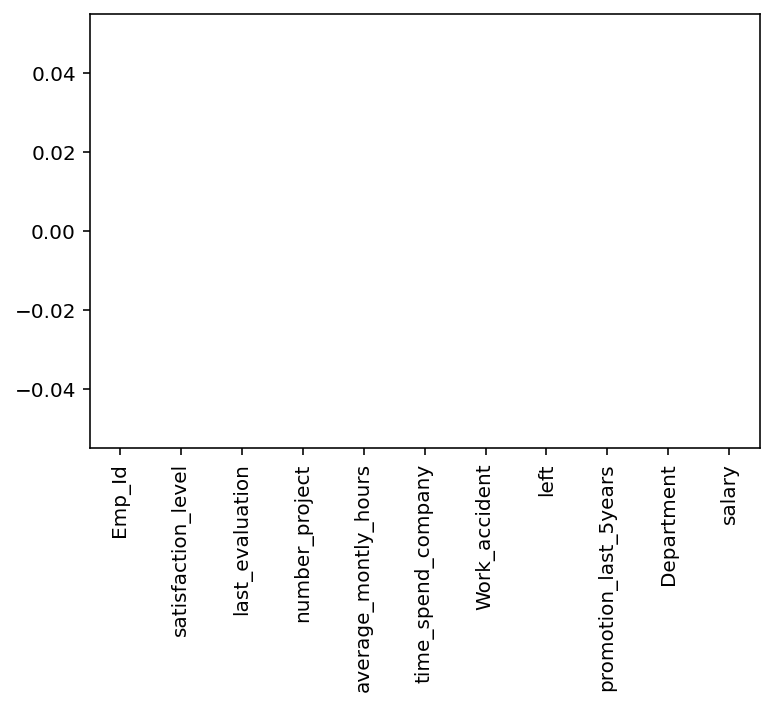

In [ ]:
empdf.isna().sum().plot.bar()
# check missing values count by each column

- > There seems to be no missing values in any columns

In [ ]:
#check for duplicate employee records
empdf.Emp_Id.nunique()

14999

- > There are no duplicate employee records

In [ ]:
#making columns lower
empdf.columns = [str.lower(x) for x in empdf.columns]

In [ ]:
empdf.head()

,emp_id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#check dtypes, convert according to data
empdf["department"] = empdf["department"].astype('category')
empdf["salary"] = empdf["salary"].astype('category')
empdf["salary"] = empdf["salary"].cat.reorder_categories(['low','medium','high'])

#convert target variable and dependent booleans to correct dtype
empdf["work_accident"] = empdf["work_accident"].astype('bool')
empdf["left"] = empdf["left"].astype('bool')
empdf["promotion_last_5years"] = empdf["promotion_last_5years"].astype('bool')

In [ ]:
empdf.info(), empdf.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   emp_id                 14999 non-null  object  
 1   satisfaction_level     14999 non-null  float64 
 2   last_evaluation        14999 non-null  float64 
 3   number_project         14999 non-null  int64   
 4   average_montly_hours   14999 non-null  int64   
 5   time_spend_company     14999 non-null  int64   
 6   work_accident          14999 non-null  bool    
 7   left                   14999 non-null  bool    
 8   promotion_last_5years  14999 non-null  bool    
 9   department             14999 non-null  category
 10  salary                 14999 non-null  category
dtypes: bool(3), category(2), float64(2), int64(3), object(1)
memory usage: 776.9+ KB


(None, (14999, 11))

In [ ]:
# empdf_left = empdf[empdf["left"]==True]
# empdf_stay = empdf[empdf["left"]==False]

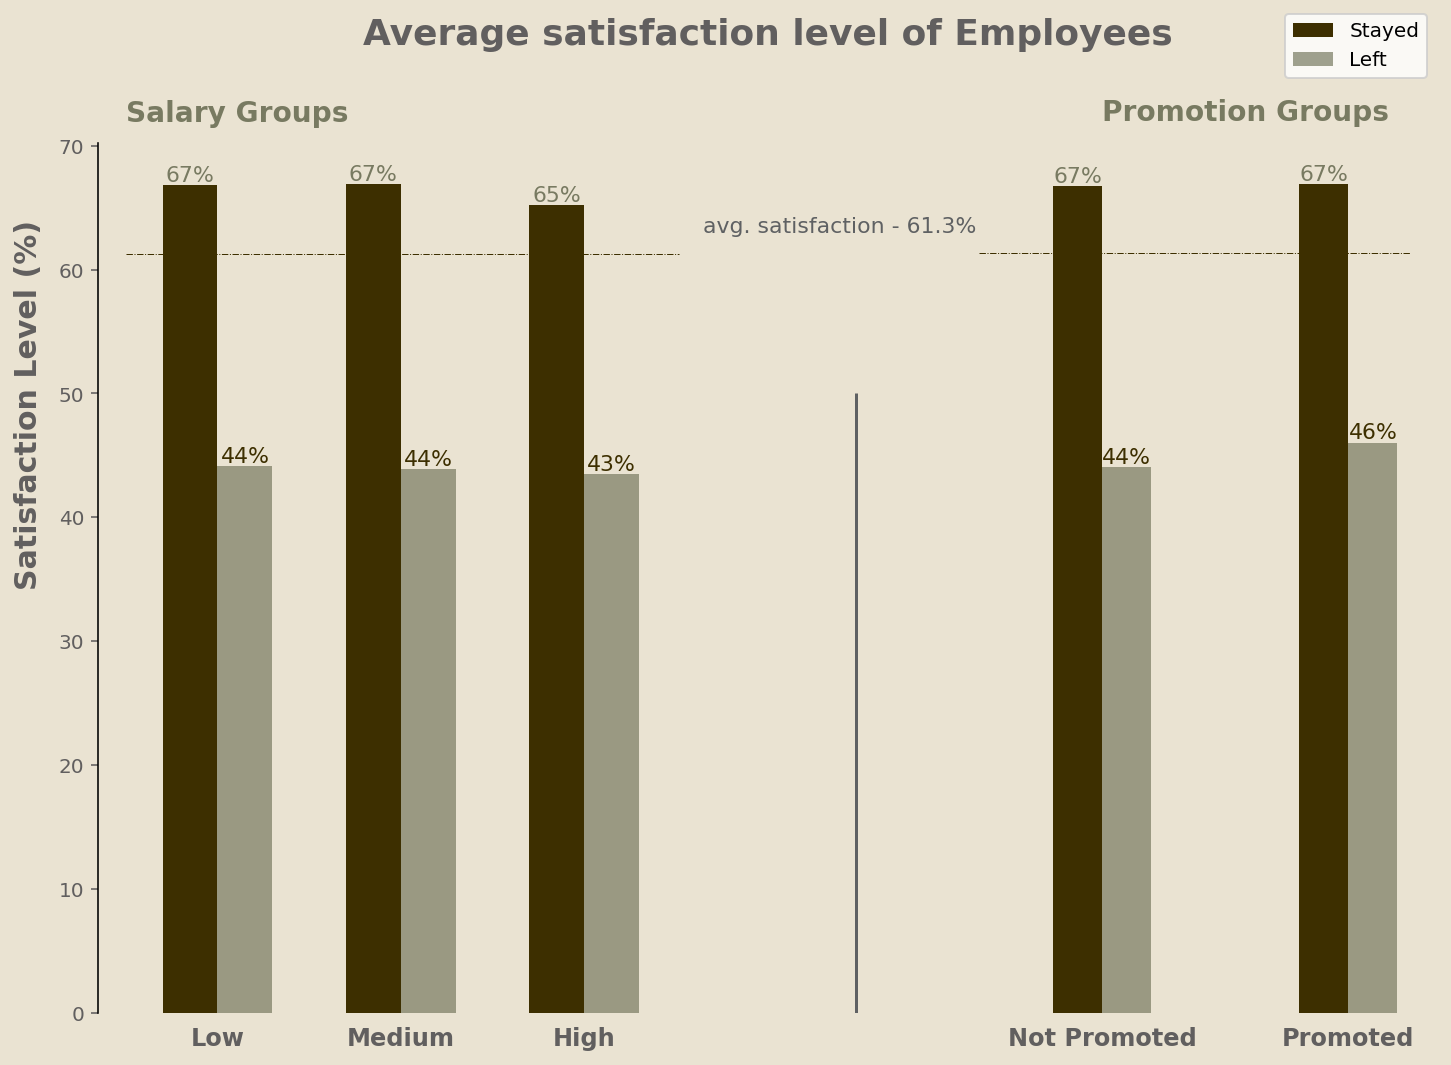

In [ ]:
emp_salsat_attrition = pd.crosstab(index= empdf["salary"],columns =empdf["left"],values=empdf["satisfaction_level"],aggfunc=np.mean)
emp_salpromo_attrition = pd.crosstab(index= empdf["promotion_last_5years"],columns =empdf["left"],values=empdf["satisfaction_level"],aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
ax1 = axes[0]
ax2 = axes[1]

xaxis = np.arange(1,4)
w1 = 0.3
w2=0.08
bar1=ax1.bar(xaxis-w1/2, emp_salsat_attrition[False].values*100, width=w1, color="#3D2F00", label="Stayed",edgecolor='none')
bar2=ax1.bar(xaxis+w1/2, emp_salsat_attrition[True]*100, width=w1, color="#787A61", alpha=0.7, label="Left",edgecolor='none')


xaxis2 = np.array([1,1.4])
bar3=ax2.bar(xaxis2-w2/2, emp_salpromo_attrition[False].values*100, width=w2, color="#3D2F00", label="Stayed",edgecolor='none')
bar4=ax2.bar(xaxis2+w2/2, emp_salpromo_attrition[True]*100, width=w2, color="#787A61", alpha=0.7, label="Left",edgecolor='none')
ax1.hlines(y=empdf["satisfaction_level"].mean()*100, xmin=0.5, xmax=3.52, color="#3D2F00", lw=0.5, linestyle="-.")
ax2.hlines(y=empdf["satisfaction_level"].mean()*100, xmin=0.8, xmax=1.5, color="#3D2F00", lw=0.5, linestyle="-.")


ax1.set_xticks(xaxis)
ax1.set_xticklabels(["Low", "Medium", "High"],rotation=0,fontsize=12, fontweight="bold", color="#615f5f")
ax2.set_xticks(xaxis2)
ax2.set_xticklabels(["Not Promoted", "Promoted"],rotation=0,fontsize=12, fontweight="bold", color="#615f5f")

ax1.set_ylabel("Satisfaction Level (%)", c = '#615f5f', fontsize = 15, weight = 'bold')
ax1.yaxis.set_label_coords(-0.09, 0.7) 
ax1.tick_params(axis='x', colors='#615f5f', bottom=False)
ax1.xaxis.label.set_color('#615f5f')
ax1.tick_params(axis='y', colors='#615f5f')
ax1.yaxis.label.set_color('#615f5f')

ax1.text(0.5, 72, "Salary Groups", fontsize=14, fontweight="bold", color="#787A61")
ax2.text(1, 72, "Promotion Groups", fontsize=14, fontweight="bold", color="#787A61")
ax2.set_yticks([])
# ax1.set_yticks([])
ax2.tick_params(axis='x', colors='#615f5f', bottom=False)
ax2.xaxis.label.set_color('#615f5f')
ax2.tick_params(axis='y', colors='#615f5f')
ax2.yaxis.label.set_color('#615f5f')

ax1.set_title("Average satisfaction level of Employees",fontsize=18, fontweight="bold", color="#615f5f",x=1.1,y=1.1)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(True)

ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax1.bar_label(bar1,fmt="%.0f%%",label_type="edge",rotation=0,fontsize = 11,  color="#787A61")
ax1.bar_label(bar2,fmt="%.0f%%",label_type="edge",rotation=0,fontsize = 11,  color="#3D2F00")

ax2.bar_label(bar3,fmt="%.0f%%",label_type="edge",rotation=0,fontsize = 11,  color="#787A61")
ax2.bar_label(bar4,fmt="%.0f%%",label_type="edge",rotation=0,fontsize = 11,  color="#3D2F00")
ax1.set_facecolor("#EAE3D2")
ax2.set_facecolor("#EAE3D2")
fig.patch.set_facecolor("#EAE3D2")

ax2.legend(loc='best',bbox_to_anchor=(1,1.16))
plt.text(x=.35,y=63,s="avg. satisfaction - 61.3%",rotation=0,fontsize=11, color="#5f6163",weight="light")
plt.vlines(x=0.6,ymax=50,ymin=0,color="#5f6163")
plt.show()

The above two plots show the average satisfaction levels reported by the employees in two groups
- > one, differentiated by their salary ranges,
- > two, differentiated by whether they were promoted in the last 5 years.

As we can clearly see above, employees who left have a lower average satisfaction level compared to employees who stayed.

- > Overall employee Satisfaction levels are a clear indicator of employee attrition, regardless of their salary groups and whether or not they were promoted.

**HR should be focusing on those employees who have below average satisfaction levels as they are more prone to attrite. (Average satisfaction levels of employees who left is ~44%)**

*Salary levels and promotions over the past 5 years do not seem to be affecting attrition rate compared to that of their satisfaction levels.*
Let's dig into the relationship between salary groups and attrition rate further. 


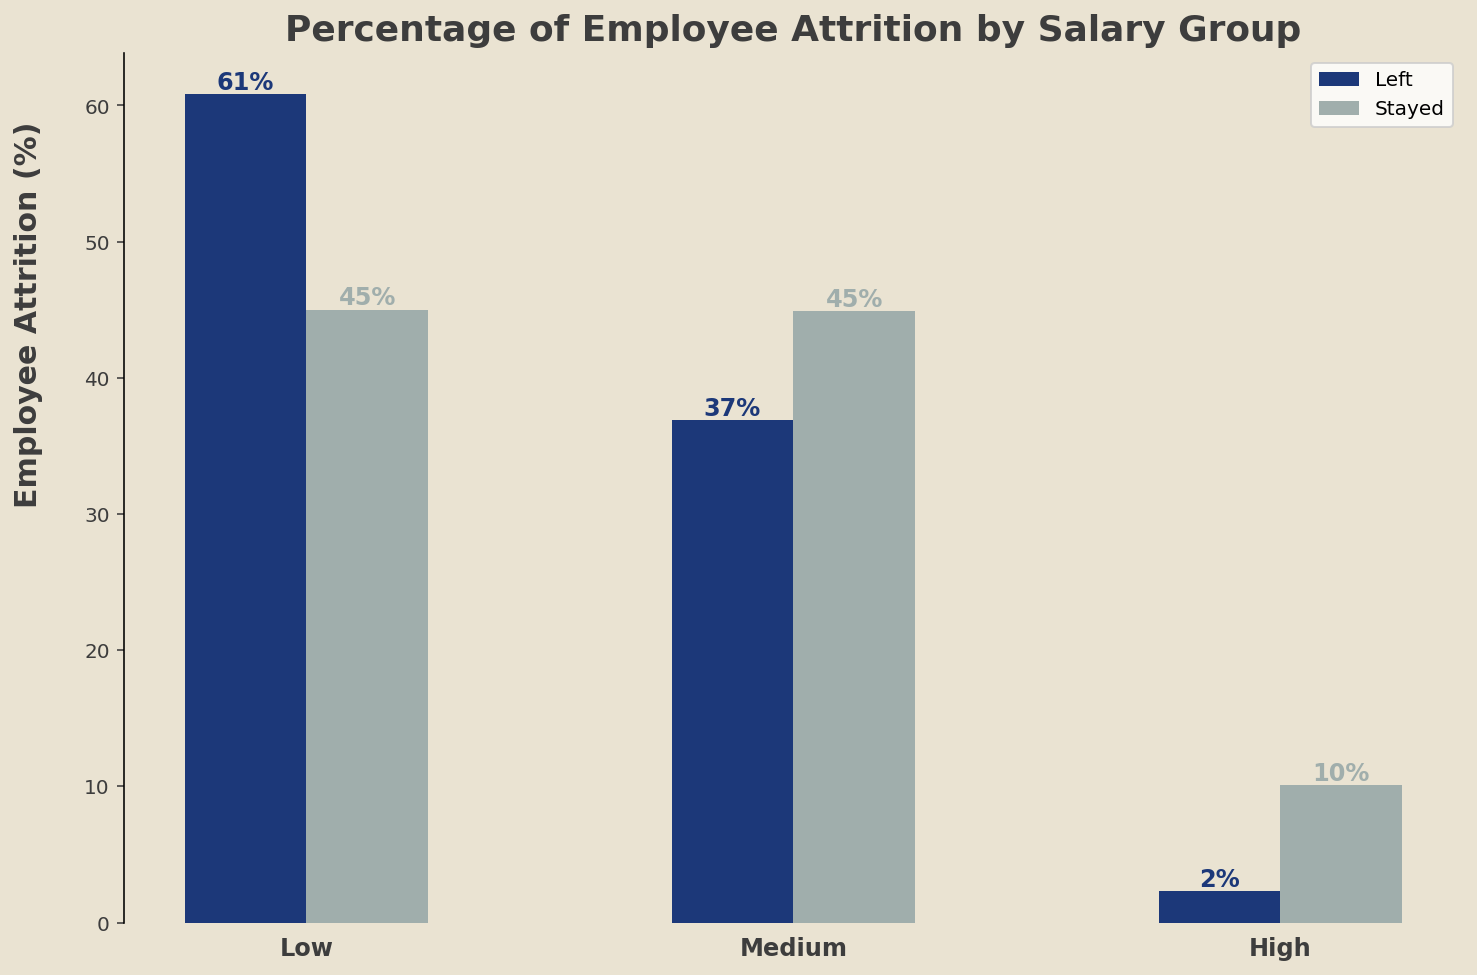

In [ ]:
left = ((empdf.groupby("salary").sum()["left"])/(empdf.groupby(["left","salary"]).count()["emp_id"][True].sum())).values
stayed = ((empdf.groupby("salary").count()["left"] - empdf.groupby("salary").sum()["left"])/(empdf.groupby(["left","salary"]).count()["emp_id"][False].sum())).values

fig, ax = plt.subplots(figsize=(12,8))
w = .25 

x = np.arange(1,4)
bar1 = ax.bar(x-w/2, left*100,  width=w, color='#1C3879', label="Left",edgecolor='none')
bar2 = ax.bar(x+w/2, stayed*100, width=w, color='#A0AEAC', label="Stayed",edgecolor='none')

ax.set_xticks(x)
ax.set_xticklabels(['Low','Medium',"High"],rotation=0,fontsize=12, fontweight="bold", color="#3d3d3d")
ax.tick_params(axis='x', colors='#3d3d3d', bottom=False)
ax.tick_params(axis='y', colors='#3d3d3d')
ax.yaxis.label.set_color('#3d3d3d')

ax.set_ylabel("Employee Attrition (%)", c = '#3d3d3d', fontsize = 15, weight = 'bold')
ax.yaxis.set_label_coords(-0.06, 0.7) 
ax.set_title('Percentage of Employee Attrition by Salary Group',fontsize=18, fontweight="bold", color="#3d3d3d")
ax.bar_label(bar1,fmt="%.0f%%",label_type="edge",rotation=0,fontsize = 12, fontweight="bold", color="#1C3879")
ax.bar_label(bar2,fmt="%.0f%%",label_type="edge",rotation=0,fontsize = 12, fontweight="bold", color="#A0AEAC")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_facecolor("#EAE3D2")
ax.set_facecolor("#EAE3D2")
fig.patch.set_facecolor("#EAE3D2")

plt.legend()
# plt.savefig("1.png",dpi=80)
plt.show()

The above plot represents the percentage of employees who left/stayed with the company across different salary groups.

The plot clearly represents that employees in the low and medium salary group leave the company at a signiicantly higher rate than the employees with high salary. **More than half the employees who left were low salaried employees**

**This could be another potential reason for attrition. Employees with lower/medium salaries, have lower satisfaction levels** (which we saw earlier as a clear indicator of employee attrition) and the employee eventually leaves the company for greener pastures. 

Let's focus on a breakdown of our key indicator so far - satisfaction levels, and see if we can find another link apart from salary. **Apart from salary, does anything affect employee satisfaction?**


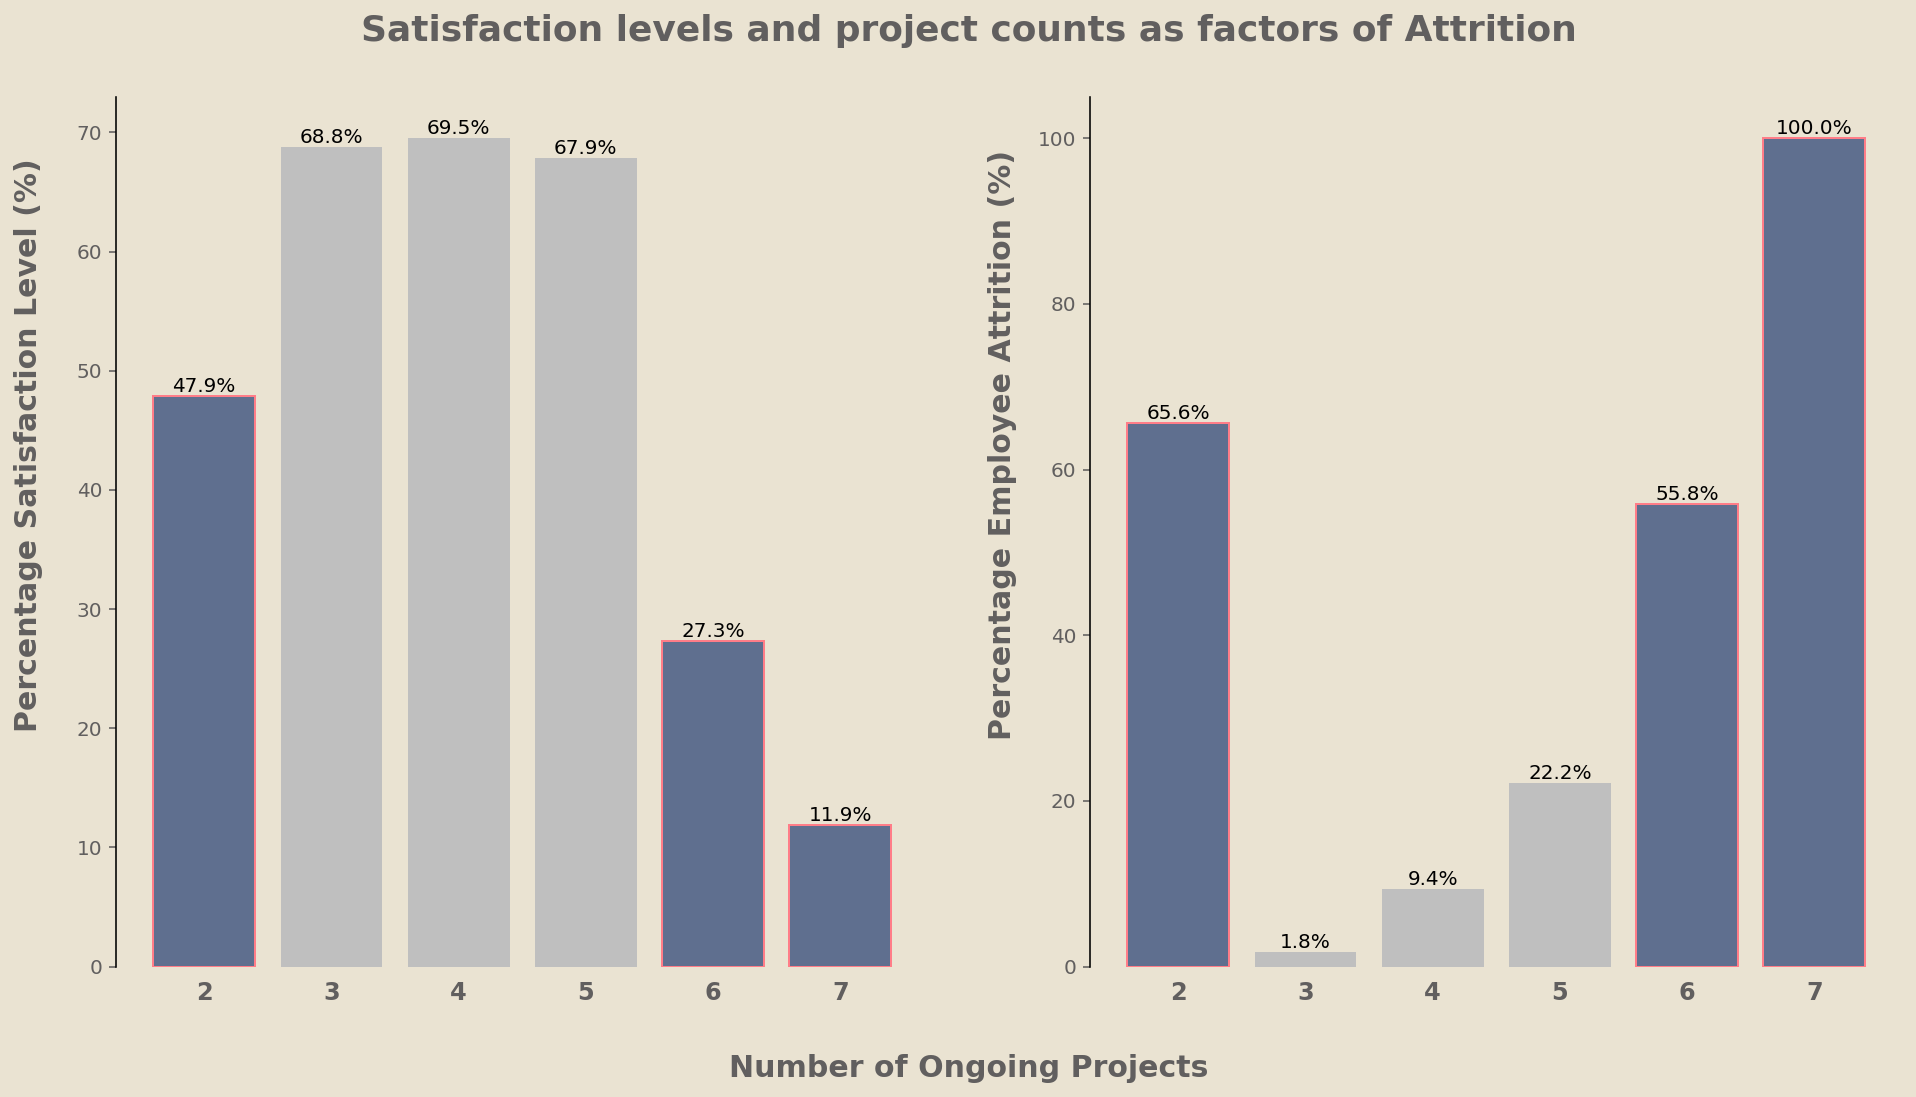

In [ ]:
edgecolors = ["#FF7D88",'none','none','none',"#FF7D88","#FF7D88"]
colors = ["#5F6F8F","#BFBFBF","#BFBFBF","#BFBFBF","#5F6F8F","#5F6F8F"]
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
ax = axes[0]
tdf_ = empdf.groupby("number_project").mean()["satisfaction_level"]*100
ax.bar(tdf_.index, tdf_,edgecolor=edgecolors,color=colors)
ax.bar_label(ax.containers[0],fmt="%.1f%%")

ax.set_xticks(tdf_.index)
ax.set_xticklabels(tdf_.index.tolist(),rotation=0,fontsize=12, fontweight="bold", color="#615f5f")
ax.tick_params(axis='x', colors='#615f5f', bottom=False)
ax.tick_params(axis='y', colors='#615f5f')
ax.yaxis.label.set_color('#615f5f')

ax.set_ylabel("Percentage Satisfaction Level (%)", c = '#615f5f', fontsize = 15, weight = 'bold')
ax.set_xlabel("Number of Ongoing Projects", c = '#615f5f', fontsize = 15, weight = 'bold')
ax.yaxis.set_label_coords(-0.09, 0.6) 
ax.xaxis.set_label_coords(1.05,-0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_facecolor("#EAE3D2")
ax.set_facecolor("#EAE3D2")
fig.patch.set_facecolor("#EAE3D2")

ax1 = axes[1]
tdf_ = empdf.groupby("number_project").sum()["left"]/empdf.groupby("number_project").count()["left"] * 100
ax1.bar(tdf_.index, tdf_,edgecolor=edgecolors,color=colors)
ax1.bar_label(ax1.containers[0],fmt="%.1f%%")

ax1.set_xticks(tdf_.index)
ax1.set_xticklabels(tdf_.index.tolist(),rotation=0,fontsize=12, fontweight="bold", color="#615f5f")
ax1.tick_params(axis='x', colors='#615f5f', bottom=False)
ax1.tick_params(axis='y', colors='#615f5f')
ax1.yaxis.label.set_color('#615f5f')

ax1.set_ylabel("Percentage Employee Attrition (%)", c = '#615f5f', fontsize = 15, weight = 'bold')
# ax1.set_xlabel("Number of Ongoing Projects", c = '#615f5f', fontsize = 15, weight = 'bold')
ax1.yaxis.set_label_coords(-0.09, 0.6) 
ax.set_title('Satisfaction levels and project counts as factors of Attrition',fontsize=18, fontweight="bold", color="#615f5f",x=1.05,y=1.05)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


ax1.set_facecolor("#EAE3D2")
ax1.set_facecolor("#EAE3D2")
fig.patch.set_facecolor("#EAE3D2")


plt.show()

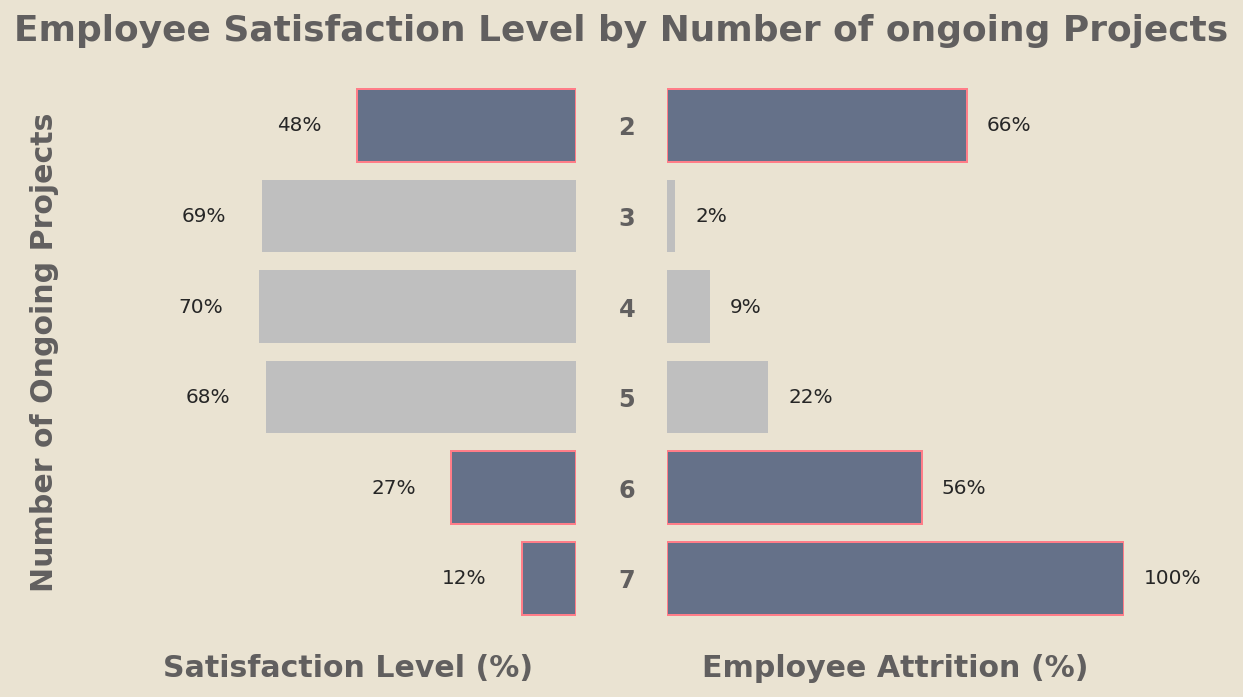

In [ ]:
edgecolors = ["#FF7D88",'none','none','none',"#FF7D88","#FF7D88"]
colors = ["#5F6F8F","#BFBFBF","#BFBFBF","#BFBFBF","#5F6F8F","#5F6F8F"]

tdf_ = empdf.groupby("number_project").mean()["satisfaction_level"]*100
tdf_ = tdf_.reset_index()

tdf_2 = empdf.groupby("number_project").sum()["left"]/empdf.groupby("number_project").count()["left"] * 100
tdf_2 = tdf_2.reset_index()

sns.set_theme(style="white")

fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(9,5))
ax1 = axes[1]
ax0 = axes[0]
sns.barplot(data=tdf_, y="number_project",x ="satisfaction_level",orient='h',palette=colors,ax=axes[0],edgecolor=edgecolors)
sns.barplot(data=tdf_2, y="number_project",x ="left",orient='h',palette=colors,ax=axes[1],edgecolor=edgecolors)
sns.despine(left=True, bottom=True)

# ax1.set_xticks(tdf_.index)
# ax1.set_xticklabels(tdf_.index.tolist(),rotation=0,fontsize=12, fontweight="bold", color="#615f5f")
ax1.tick_params(axis='x', colors='#615f5f', bottom=False)
ax1.tick_params(axis='y', colors='#615f5f')
ax1.yaxis.label.set_color('#615f5f')
ax0.set_ylabel("Number of Ongoing Projects", c = '#615f5f', fontsize = 15, weight = 'bold',labelpad=30)
ax1.set_yticklabels(tdf_.number_project.tolist(),rotation=0,fontsize=12, fontweight="bold", color="#615f5f")
ax1.tick_params(axis='y', which='major', pad=10)
# ax0.set_yticklabels(tdf_.number_project.tolist(),rotation=0,fontsize=12, fontweight="bold", color="#615f5f")

ax1.set_ylabel("")
ax0.set_yticks([])
ax1.set_xticks([])
ax0.set_xticks([])

ax0.set_xlim(0,100)
ax1.set_xlim(0,100)
# ax0.margins(x=0.2)
# ax1.margins(x=0.1)


ax0.xaxis.label.set_color('#615f5f')
ax0.invert_xaxis()

ax1.set_xlabel("Employee Attrition (%)", c = '#615f5f', fontsize = 15, weight = 'bold',labelpad=15)
ax0.set_xlabel("Satisfaction Level (%)", c = '#615f5f', fontsize = 15, weight = 'bold',labelpad=15)

ax0.set_title('Employee Satisfaction Level by Number of ongoing Projects',fontsize=18, fontweight="bold", color="#615f5f",x=1.1,y=1.05)

# ax1.bar(tdf_.index, tdf_,edgecolor=edgecolors,color=colors)
ax1.bar_label(ax1.containers[0],fmt="%.0f%%",padding=10,fontweight="light",fontsize=10)
ax0.bar_label(ax0.containers[0],fmt="%.0f%%",padding=-40,fontweight="light",fontsize=10)

ax1.set_facecolor("#EAE3D2")
ax0.set_facecolor("#EAE3D2")
fig.patch.set_facecolor("#EAE3D2")


# plt.savefig("#proj_satis.png",dpi=100)
plt.show()

The above plot explores the relationship between **satisfaction levels** and **employee attrition** while focussing on **number of ongoing projects**

As it is clearly evident, employees who have only 2 projects, or have more than 5 projects have significantly lower satisfaction levels than the average (61%) and other employees. 

As we've established clearly, low satisfaction levels lead to attrition, as expected, 100% of the employees with 7 projects have left the company. Also,more than 55% of employees with 6 projects or 2 projects have left the company.

Infering from the above plot, employees don't feel challenged enough with only 2 projects and leave the company for better opportunities, or they are burned out by overworking, where working on more than 5 projects causes the employee to quit.

HR should focus on the three important factors to increase employee retention : 
 1. **Increase Employee Satisfaction levels,**
 2. **Restructure Salary - which affects satisfaction levels to some degree**
 3. **Ensure proper Number of Projects/ Prevent Burnout - Adequately engage and challenge the employee so as to not cause burnout.**



In [ ]:
# violin plot on average working hours distribution on different number of projects


In [ ]:
# Yuhsin starts here
# ------------------

In [ ]:
emp2 = em_data.copy()
emp2.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


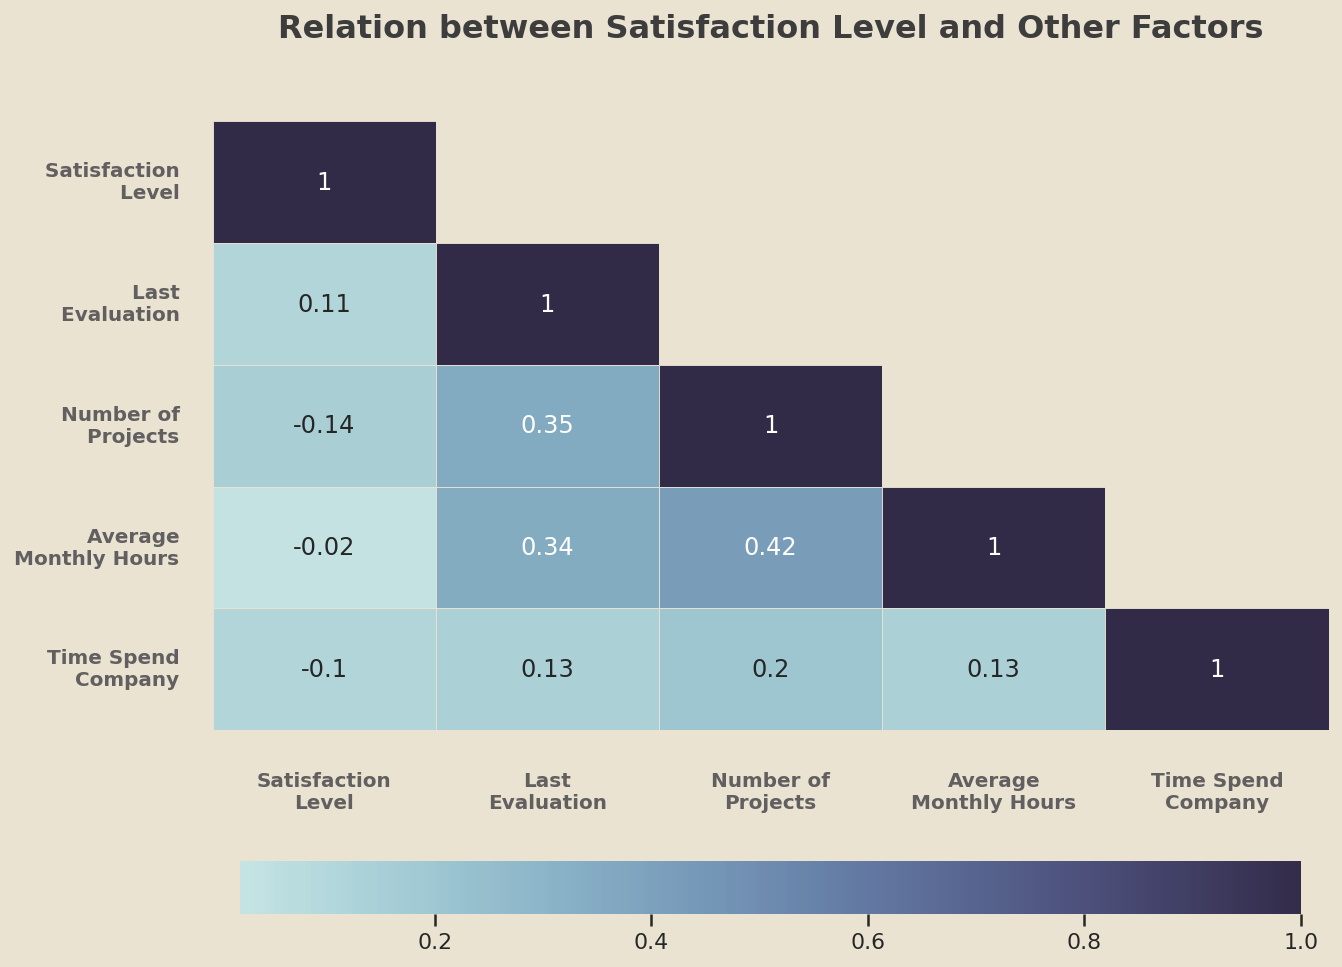

In [ ]:
# Question 1: The satisfaction_level is influenced by which factors?

df_corr = pd.DataFrame({'satisfaction_level': emp2['satisfaction_level'], 'last_evaluation': emp2['last_evaluation'], 'number_project': emp2['number_project'],\
                        'average_montly_hours': emp2['average_montly_hours'], 'time_spend_company': emp2['time_spend_company']})

corr = df_corr.corr()
corr_ab = np.abs(corr)

fig, ax = plt.subplots(figsize = (10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool), 1)
c = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
ax = sns.heatmap(corr_ab, annot=corr, cmap=c, alpha=.95, mask=mask, cbar_kws={'shrink': .95, 'orientation': 'horizontal'}, 
                 linewidths=.5, linecolor='#EAE3D2')
ax.set_title('Relation between Satisfaction Level and Other Factors\n\n', fontsize=16, fontweight="bold", color="#3d3d3d")
ax.tick_params(axis='both', colors='#615f5f', bottom=False, left=False)

ax.set_xticklabels(['\nSatisfaction\nLevel',
 '\nLast\nEvaluation',
 '\nNumber of\nProjects',
 '\nAverage\nMonthly Hours',
 '\nTime Spend\nCompany'], rotation=0, fontsize=10, fontweight="bold", color="#615f5f")
ax.set_yticklabels(['Satisfaction  \nLevel  ',
 'Last  \nEvaluation  ',
 'Number of  \nProjects  ',
 'Average  \nMonthly Hours  ',
 'Time Spend  \nCompany  '], rotation=0, fontsize=10, fontweight="bold", color="#615f5f")

ax.set_facecolor("#EAE3D2")
fig.patch.set_facecolor("#EAE3D2")

plt.show()
# fig.savefig("image_filename.png", edgecolor=fig.get_edgecolor())

In [ ]:
emp2['left2'] = np.nan
emp2['left2'][emp2['left'] == 1] = 'Left'
emp2['left2'][emp2['left'] == 0] = 'Stayed'
emp2_left = emp2[emp2['left'] == 1]
emp2_stayed = emp2[emp2['left'] == 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


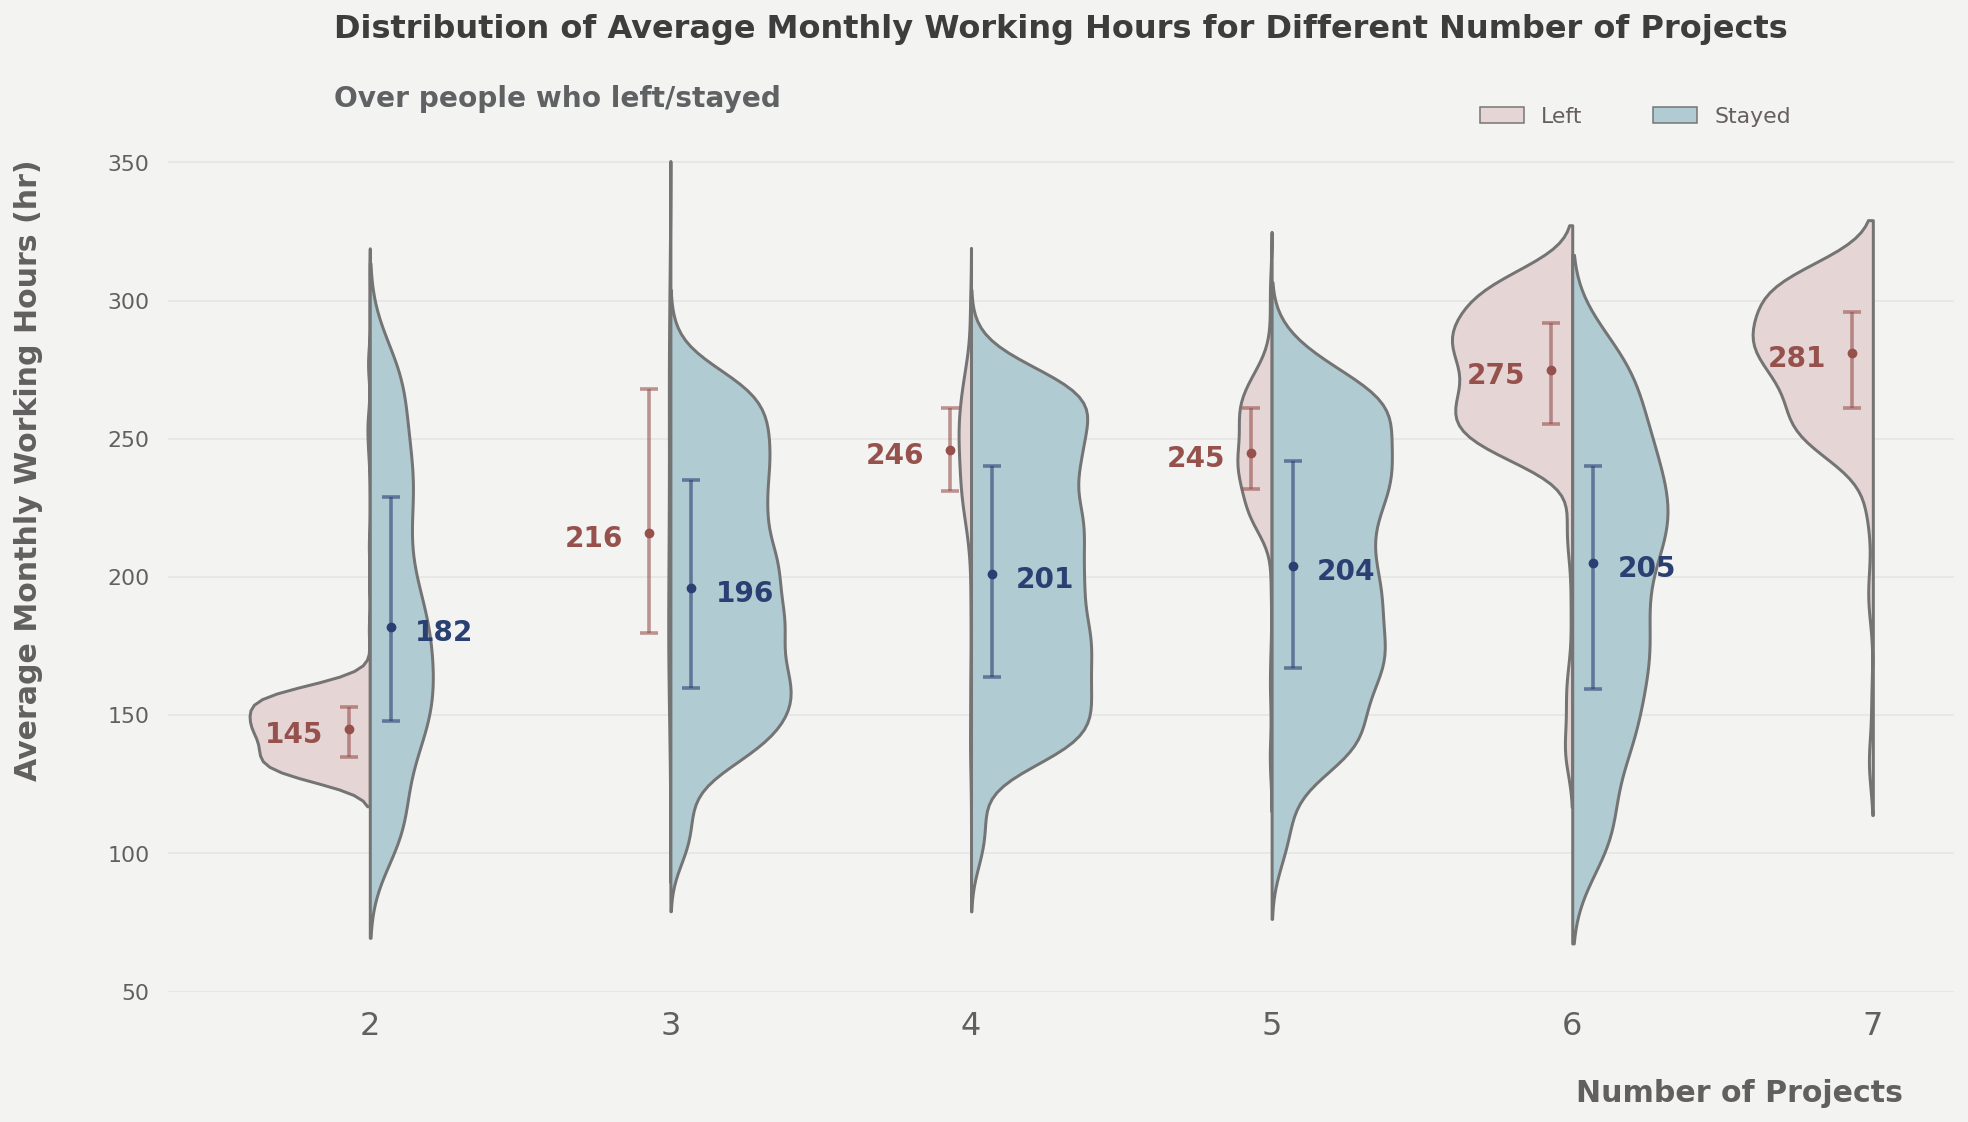

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
ax = sns.violinplot(x="number_project", y="average_montly_hours", hue="left2", data=emp2, palette=["#e8d3d1", "#abced8"], split=True, scale="count", inner=None)

ax.set_title('Distribution of Average Monthly Working Hours for Different Number of Projects\n\n', fontsize=16, fontweight="bold", color="#3d3d3d")
ax.tick_params(axis='y', colors='#615f5f', bottom=False)
ax.tick_params(axis='x', colors='#615f5f', bottom=False, labelsize=16)
ax.set_ylabel("Average Monthly Working Hours (hr)", c = '#615f5f', fontsize = 15, weight = 'bold')
ax.yaxis.set_label_coords(-0.07, 0.6) 
ax.set_xlabel("Number of Projects", c = '#615f5f', fontsize = 15, weight = 'bold')
ax.xaxis.set_label_coords(0.88, -0.1)

for i in range(2, 8):
    ax.vlines(x=-.07+(i-2), ymax=emp2_left['average_montly_hours'][emp2_left['number_project']==i].quantile(.75), 
              ymin=emp2_left['average_montly_hours'][emp2_left['number_project']==i].quantile(.25), color='#96514d',linewidth=1.8,alpha=0.6)
    ax.hlines(y=emp2_left['average_montly_hours'][emp2_left['number_project']==i].quantile(.75), xmax=-.04+(i-2), 
              xmin=-.1+(i-2), color='#96514d',linewidth=1.8,alpha=0.6)
    ax.hlines(y=emp2_left['average_montly_hours'][emp2_left['number_project']==i].quantile(.25), xmax=-.04+(i-2), 
              xmin=-.1+(i-2), color='#96514d',linewidth=1.8,alpha=0.6)
    ax.scatter(x=-.07+(i-2), y=emp2_left['average_montly_hours'][emp2_left['number_project']==i].median(), color='#96514d', s=15)
    ax.annotate(f"{round(emp2_left['average_montly_hours'][emp2_left['number_project']==i].median())}", 
                (-.35+(i-2), emp2_left['average_montly_hours'][emp2_left['number_project']==i].median()-5), size=14, color='#96514d', weight='bold')
    if i != 7:
        ax.vlines(x=.07+(i-2), ymax=emp2_stayed['average_montly_hours'][emp2_stayed['number_project']==i].quantile(.75), 
                  ymin=emp2_stayed['average_montly_hours'][emp2_stayed['number_project']==i].quantile(.25), color='#2a4073',linewidth=1.8,alpha=0.6)
        ax.hlines(y=emp2_stayed['average_montly_hours'][emp2_stayed['number_project']==i].quantile(.75), xmax=.1+(i-2), 
                  xmin=.04+(i-2), color='#2a4073',linewidth=1.8,alpha=0.6)
        ax.hlines(y=emp2_stayed['average_montly_hours'][emp2_stayed['number_project']==i].quantile(.25), xmax=.1+(i-2), 
                  xmin=.04+(i-2), color='#2a4073',linewidth=1.8,alpha=0.6)
        ax.scatter(x=.07+(i-2), y=emp2_stayed['average_montly_hours'][emp2_stayed['number_project']==i].median(), color='#2a4073', s=15)
        ax.annotate(f"{round(emp2_stayed['average_montly_hours'][emp2_stayed['number_project']==i].median())}", 
                    (.15+(i-2), emp2_stayed['average_montly_hours'][emp2_stayed['number_project']==i].median()-5), size=14, color='#2a4073', weight='bold')

ax.grid(color='grey', axis = 'y', linestyle='solid', linewidth=1, alpha=0.1)
plt.ylim(bottom=50)
ax.text(-.12, 370, "Over people who left/stayed", fontsize=14, fontweight="bold", color="#5f6163")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_facecolor("#f3f3f2")
fig.patch.set_facecolor("#f3f3f2")

plt.legend(loc="best", bbox_to_anchor=(.92, 1.04), labelcolor='#665e61', fontsize=11, ncol=2, columnspacing=3.2, frameon=False)

plt.show()
# fig.savefig("violinplot.png", edgecolor=fig.get_edgecolor())

The above violin plot shows the distribution of the average monthly working hours for the employees who are working on different numbers of projects. We can see that except for the group of employees who are working on two projects, the left employees from other groups usually spend more working hours every month than the stayed employees from the same group. 

Also, the employees who are working on two or more than five projects are more likely to resign. Among the employees working on 7 projects, the leaving rate is 100%.

In [ ]:
# Yichen starts here
# ------------------
emp = em_data.copy()

In [ ]:
# check dtype for each column

# rename columns by convention
emp.rename(columns={"Department": "department", 
                    "Emp_Id": "id", 
                    "Work_accident": "work_accident", 
                    "promotion_last_5years": "promo_in_5"}, inplace=True)

# convert `department`, `salary` into categorical dtype
emp["department"] = emp["department"].astype("category")
emp["salary"] = emp["salary"].astype("category")

# convert `promi_in_5`, `work_accident` and `left` into boolean dtype
emp["promo_in_5"] = emp["promo_in_5"].map({0:False, 1:True})
emp["work_accident"] = emp["work_accident"].map({0:False, 1:True})
emp["left"] = emp["left"].map({0:False, 1:True})

print(emp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    14999 non-null  object  
 1   satisfaction_level    14999 non-null  float64 
 2   last_evaluation       14999 non-null  float64 
 3   number_project        14999 non-null  int64   
 4   average_montly_hours  14999 non-null  int64   
 5   time_spend_company    14999 non-null  int64   
 6   work_accident         14999 non-null  bool    
 7   left                  14999 non-null  bool    
 8   promo_in_5            14999 non-null  bool    
 9   department            14999 non-null  category
 10  salary                14999 non-null  category
dtypes: bool(3), category(2), float64(2), int64(3), object(1)
memory usage: 776.9+ KB
None


In [ ]:
# data cleaning

# categorical columns
print(f"There are {emp.isnull().sum().sum()} missing values in our data.")
print("")
cat = ["department", "salary", "promo_in_5", "work_accident", "left"]
for col in cat:
  print(emp[col].unique())

There are 0 missing values in our data.

['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
Categories (10, object): ['IT', 'RandD', 'accounting', 'hr', ..., 'product_mng', 'sales',
                          'support', 'technical']
['low', 'medium', 'high']
Categories (3, object): ['high', 'low', 'medium']
[False  True]
[False  True]
[ True False]


In [ ]:
# numerical columns
emp.drop(columns=cat).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [ ]:
# Everything seems normal regarding missingness. Now we display the dataset and start with some EDA.
emp = emp.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 7]]
emp.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promo_in_5,department,salary,left
0,IND02438,0.38,0.53,2,157,3,False,False,sales,low,True
1,IND28133,0.80,0.86,5,262,6,False,False,sales,medium,True
2,IND07164,0.11,0.88,7,272,4,False,False,sales,medium,True
3,IND30478,0.72,0.87,5,223,5,False,False,sales,low,True
4,IND24003,0.37,0.52,2,159,3,False,False,sales,low,True


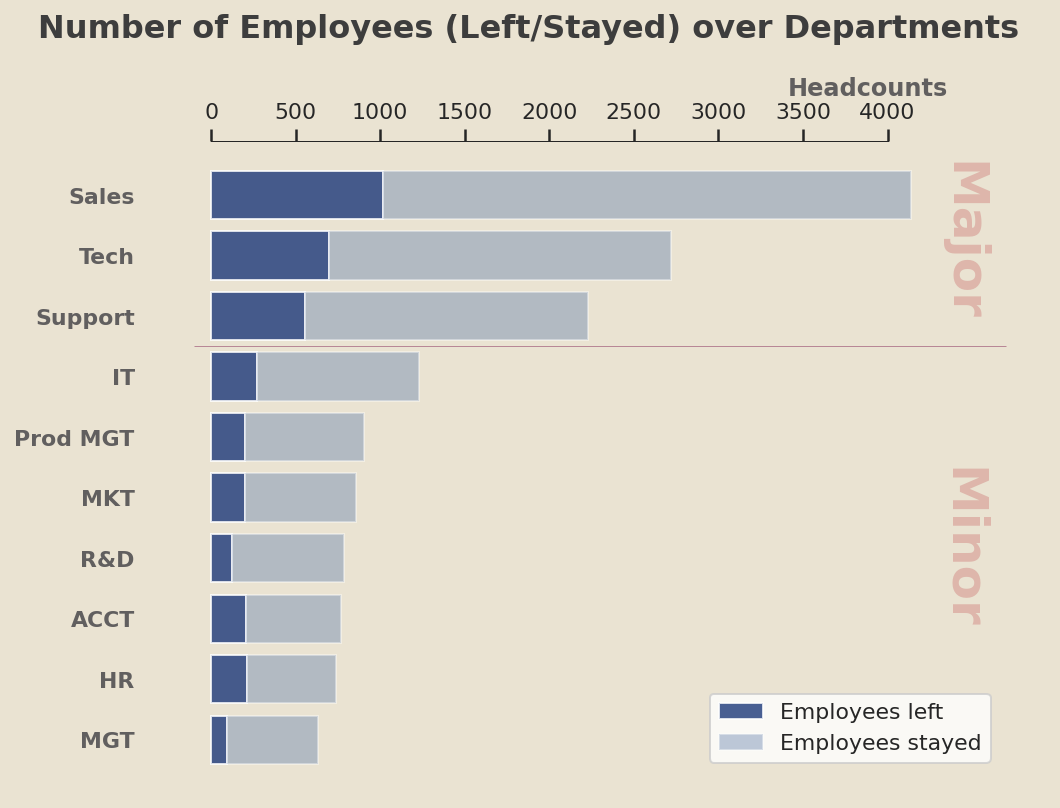

In [ ]:
# how many employees and how many of them have left in each department
dpt_counts = emp.groupby("department").count()["left"].to_frame().rename(columns={"left": "total"})

emp_left = emp[emp["left"]].copy()
dpt_counts["left"] = emp_left.groupby("department").count()["left"].values
dpt_counts["stay"] = dpt_counts["total"] - dpt_counts["left"]

dpt_counts.sort_values("total", ascending=True, inplace=True)

# plotting
fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(dpt_counts.index, dpt_counts["left"], color="#1C3879", label="Employees left", alpha=0.8)
ax.barh(dpt_counts.index, dpt_counts["stay"], left=dpt_counts["left"], color="#607EAA", alpha=0.4, label="Employees stayed")
ax.hlines(y=6.5, xmin=-100, xmax=4700, lw=0.5, color="#AC7088", alpha=0.8)
ax.text(4300, 7.1, "Major", color="#DEB6AB", fontsize=25, fontweight="bold", rotation=-90)
ax.text(4300, 2, "Minor", color="#DEB6AB", fontsize=25, fontweight="bold", rotation=-90)

ax.set_xticks(range(0, 4100, 500))
ax.set_yticks(range(10))
ax.set_yticklabels(["MGT", "HR", "ACCT", "R&D", "MKT", "Prod MGT", "IT", "Support", "Tech", "Sales"])
ax.set_xlabel("Headcounts", fontweight="bold", fontsize=12, color="#615f5f")
ax.set_title("Number of Employees (Left/Stayed) over Departments", fontsize=16, fontweight="bold", x=0.42, y=1.14, color="#3d3d3d")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.xaxis.set_label_coords(0.8, 1.07)

ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_bounds([0, 4000])
ax.spines["top"].set_linewidth(0.5)

ax.set_facecolor("#EAE3D2")
fig.patch.set_facecolor("#EAE3D2")

plt.tick_params(axis='y', which='both', left=False)
plt.yticks(fontsize=11, fontweight="bold", color="#615f5f")
plt.legend(loc="center right", bbox_to_anchor=(0.95, 0.1))
plt.show()

The above plot presents the number of employees left from each department, and the headcounts of each department in the company including those who left. The department of Management has the lowest headcount among all departments, and also the lowest number of employees left from the department. 

On the other hand, **Sales**, **Technical** and **Support** are the top three departments with most employees in the company, and at the same time, the top three major sources of resigned employees. The Sales department alone, had over 4000 employees and around 1000 of them resigned. 

We will then dig into the top three departments: Sales, Technical and Support and explore what other impacts on employees to resign. 

In [ ]:
top_3 = emp[(emp["department"] == "sales") | (emp["department"] == "technical") | (emp["department"] == "support")].copy()
top_3.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promo_in_5,department,salary,left
0,IND02438,0.38,0.53,2,157,3,False,False,sales,low,True
1,IND28133,0.80,0.86,5,262,6,False,False,sales,medium,True
2,IND07164,0.11,0.88,7,272,4,False,False,sales,medium,True
3,IND30478,0.72,0.87,5,223,5,False,False,sales,low,True
4,IND24003,0.37,0.52,2,159,3,False,False,sales,low,True


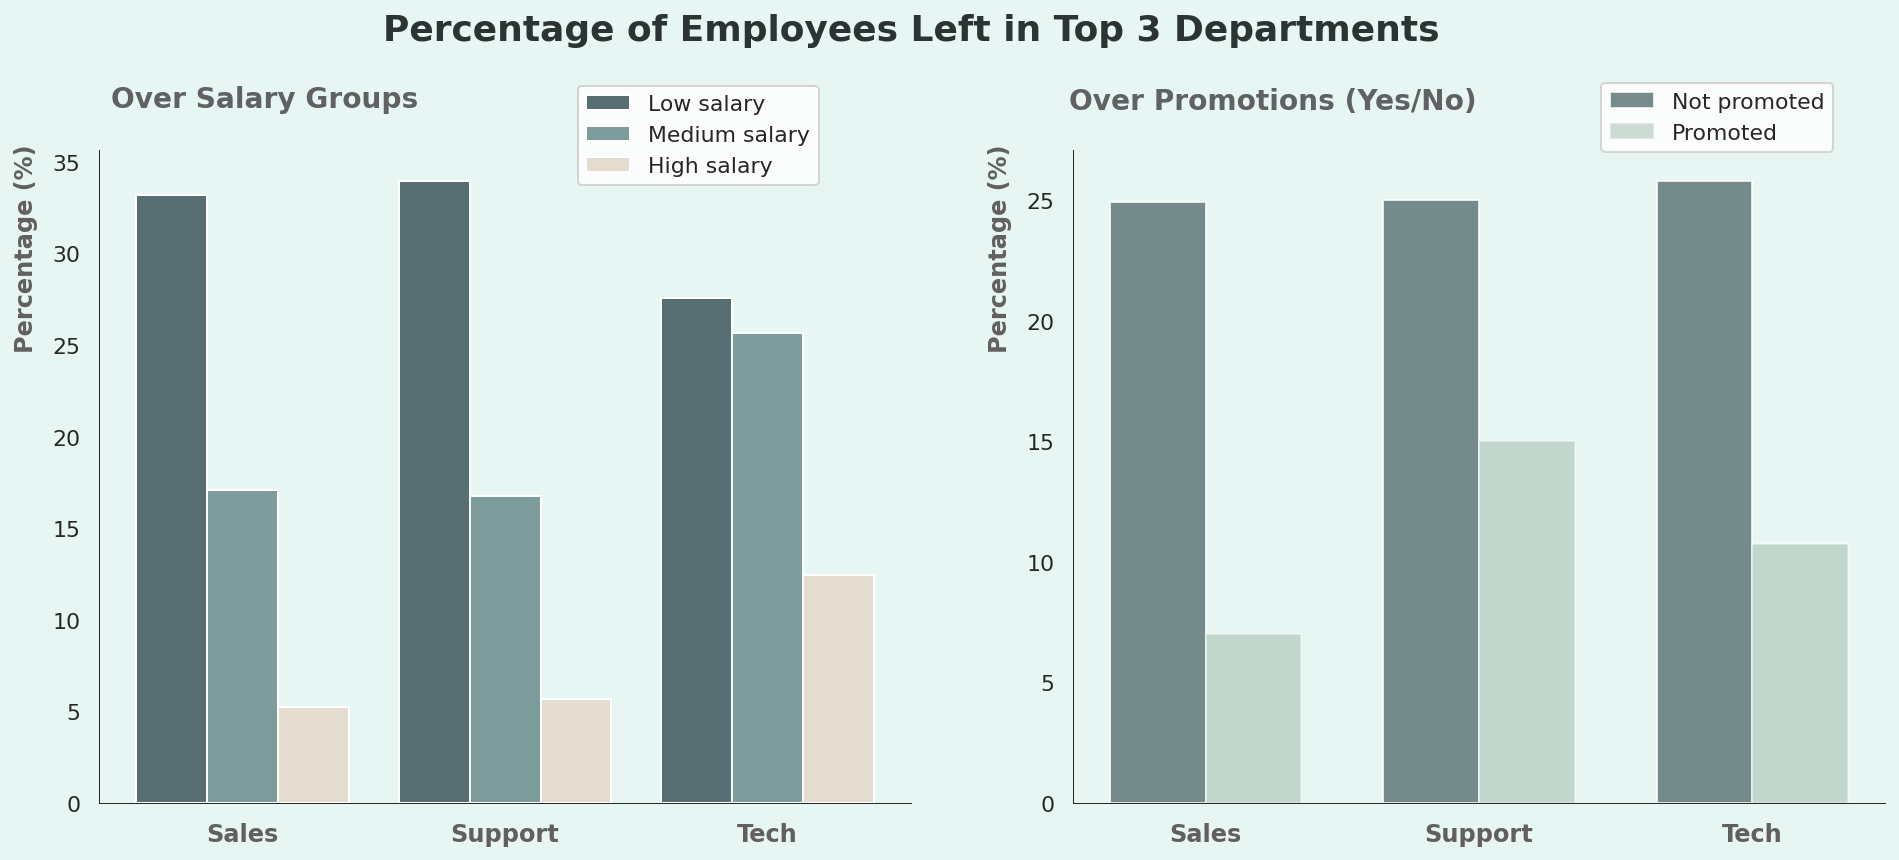

In [ ]:
dpt_slr_pct = pd.crosstab(index=top_3["department"], columns=top_3["salary"], values=top_3["left"], aggfunc=np.mean)
dpt_pro_pct = pd.crosstab(index=top_3["department"], columns=top_3["promo_in_5"], values=top_3["left"], aggfunc=np.mean)

# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1, ax2 = axes[0], axes[1]

# plot 1
xaxis1 = np.arange(1, 4)
w1 = 0.27
ax1.bar(xaxis1 - w1, dpt_slr_pct["low"].values * 100, width=w1, color="#576F72", label="Low salary")
ax1.bar(xaxis1, dpt_slr_pct["medium"].values * 100, width=w1, color="#7D9D9C", label="Medium salary")
ax1.bar(xaxis1 + w1, dpt_slr_pct["high"].values * 100, width=w1, color="#E4DCCF", label="High salary")

ax1.set_xticks(xaxis1)
ax1.set_xticklabels(["Sales", "Support", "Tech"], fontsize=12, fontweight="bold", color="#615f5f")
ax1.set_ylabel("Percentage (%)", fontweight="bold", fontsize=12, color="#615f5f")
ax1.yaxis.set_label_coords(-0.075, 0.85)
ax1.set_title("Percentage of Employees Left in Top 3 Departments", fontsize=18, fontweight="bold", color="#2C3333", x=1, y=1.15)
ax1.text(0.5, 38, "Over Salary Groups", fontsize=14, fontweight="bold", color="#5f6163")

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_linewidth(0.5)
ax1.spines["bottom"].set_linewidth(0.5)

ax1.tick_params(axis="x", which="both", bottom=False)
ax1.legend(bbox_to_anchor=(0.9, 1.116))

# plot 2
xaxis2 = np.arange(1, 4)
w2 = 0.35
ax2.bar(xaxis2 - w2/2, dpt_pro_pct[False].values * 100, width=w2, color="#576F72", alpha=0.8, label="Not promoted")
ax2.bar(xaxis2 + w2/2, dpt_pro_pct[True].values * 100, width=w2, color="#89AA97", alpha=0.4, label="Promoted")

ax2.set_xticks(xaxis2)
ax2.set_xticklabels(["Sales", "Support", "Tech"], fontsize=12, fontweight="bold", color="#615f5f")
ax2.set_ylabel("Percentage (%)", fontweight="bold", fontsize=12, color="#615f5f")
ax2.yaxis.set_label_coords(-0.075, 0.85)
ax2.text(0.5, 28.8, "Over Promotions (Yes/No)", fontsize=14, fontweight="bold", color="#5f6163")

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_linewidth(0.5)
ax2.spines["bottom"].set_linewidth(0.5)

ax2.tick_params(axis="x", which="both", bottom=False)
ax2.legend(bbox_to_anchor=(0.95, 1.12))


ax1.set_facecolor("#E7F6F2")
ax2.set_facecolor("#E7F6F2")
fig.patch.set_facecolor("#E7F6F2")

plt.show()

The above plot researches on the dimensions of **salary** and **promotions** while keeping its focus among the three top major departments in the company. It is quite evident that people with lower salary are more inclined to quit their job, especially in the Sales and Support department. The difference in percentages of resignication between high salary and low salary group in the Sales department reaches about **28%**. 

On the other hand, the plot shows a much higher proportion of people resigning if they have **never** been promoted in the last five years. The difference in percentages between people who have been promoted or not in the Sales department reaches about **18%**.

It seems that salary and opportunity of promotions are two critical elements when people make decisions on quitting the job. Therefore, it is equally essential to evaluate whether the company's assessment system on employees is reliable, in other words, whether the company offers higher salary and promotion opportunities to the "right" people. 

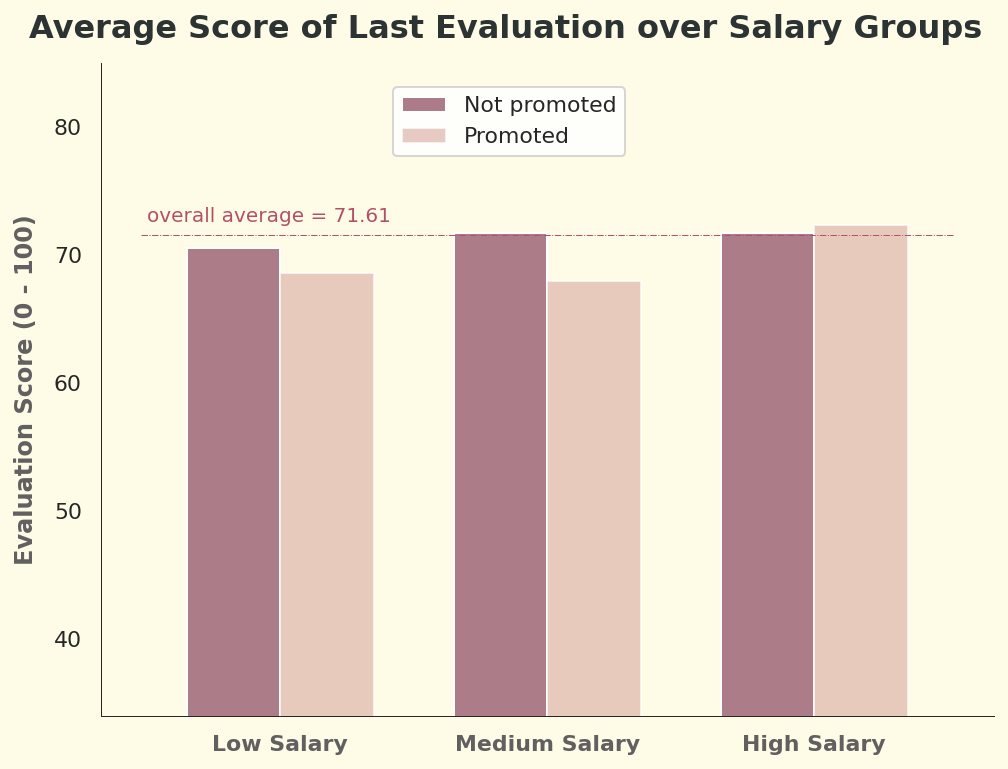

In [ ]:
ass_sys = pd.crosstab(index=emp["salary"], columns=emp["promo_in_5"], values=emp["last_evaluation"], aggfunc=np.mean)

# plotting
fig, ax = plt.subplots(figsize=(8, 6))
xaxis = np.arange(3)
w = 0.35

plt.ylim(0.34, 0.85)

ax.bar(xaxis - w/2, ass_sys[False], width=w, color="#AC7D88", label="Not promoted")
ax.bar(xaxis + w/2, ass_sys[True], width=w, color="#DEB6AB", alpha=0.7, label="Promoted")
ax.hlines(y=emp["last_evaluation"].mean(), xmin=-0.52, xmax=2.52, color="#B25068", lw=0.5, linestyle="-.")
ax.text(-0.5, emp["last_evaluation"].mean() + 0.01, "overall average = 71.61", color="#B25068", fontsize=10)

ax.set_xticks(range(3))
ax.set_xticklabels(["Low Salary", "Medium Salary", "High Salary"])
ax.set_yticks(np.arange(0.4, 0.9, 0.1))
ax.set_yticklabels([40, 50, 60, 70, 80])
ax.set_ylabel("Evaluation Score (0 - 100)", fontweight="bold", fontsize=12, color="#615f5f")
ax.yaxis.set_label_coords(-0.07, 0.5)
ax.set_title("Average Score of Last Evaluation over Salary Groups", fontsize=16, fontweight="bold", color="#2C3333", x=0.453, y=1.02)

ax.set_facecolor("#FEFBE7")
fig.patch.set_facecolor("#FEFBE7")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(0.5)
ax.spines["bottom"].set_linewidth(0.5)

plt.tick_params(axis="x", which="both", bottom=False)
plt.xticks(fontsize=11, fontweight="bold", color="#615f5f")
plt.legend(loc="upper left", bbox_to_anchor=(0.315, 0.98))
plt.show()

This plot shows the the average score of last evaluation per group while people are grouped by their salary level and promotion opportunity (i.e. if given a promotion). We see that there is no significant difference in evaluation scores between any two groups, regardless of what salary level people are offered. Furthermore, Each group's average evaluation score shows a negligible difference from the overall average score of the company. These all suggest that the salary level and promotion opportunities that people get are not reflecting how well/bad they perform while working. In other words, the company assessment system malfunctions and is draining people's loyalty to the company. Changes must be made so that every employee gets the rewards and opportunities they deserve.

Experimental plots below

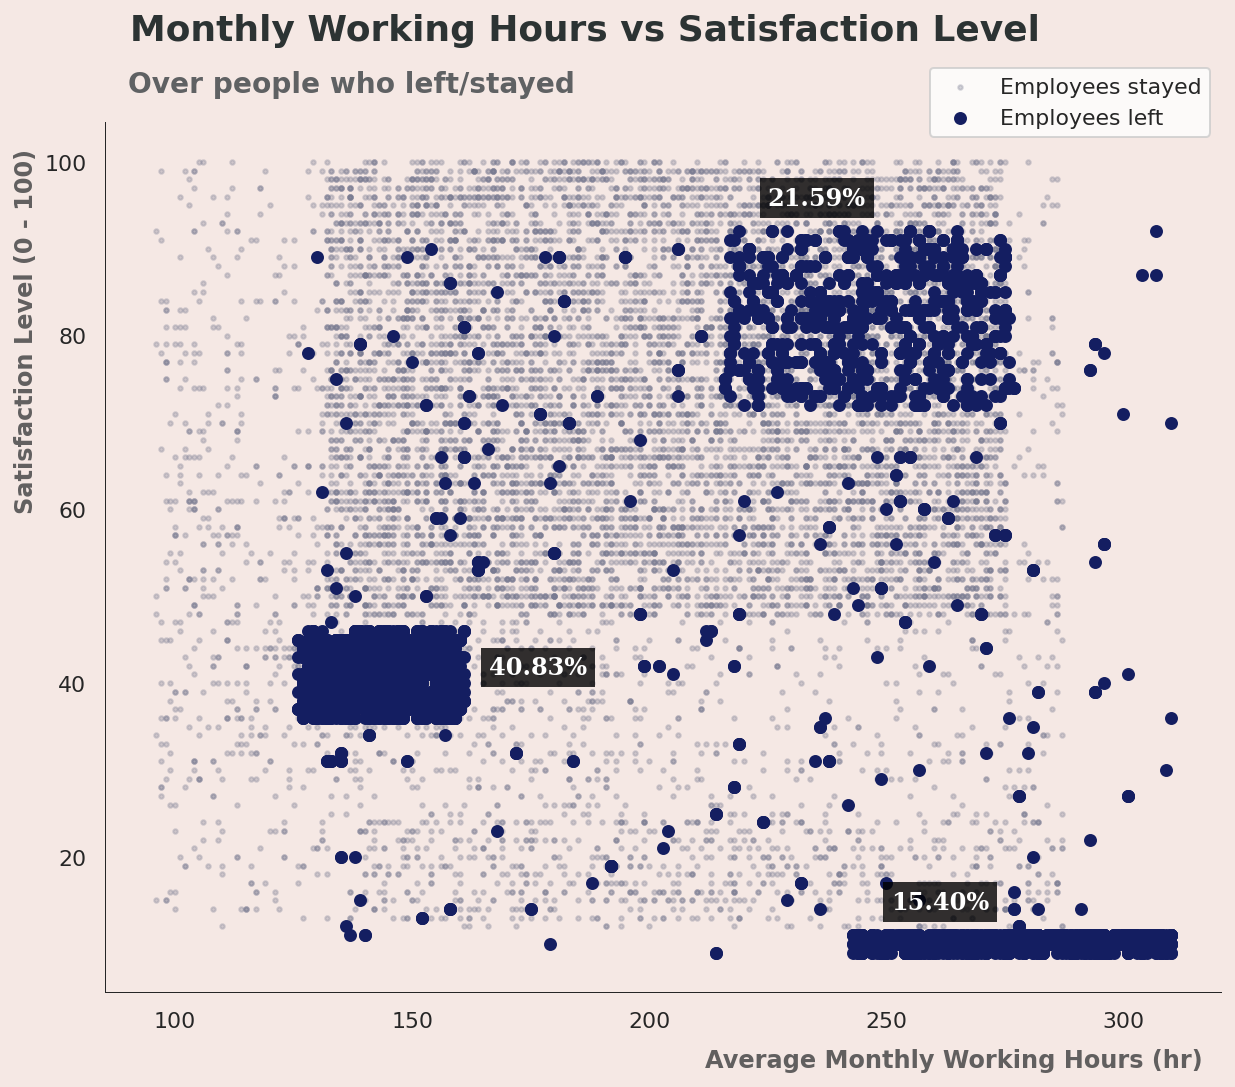

In [ ]:
emp_left = emp[emp["left"]]
emp_stay = emp[~emp["left"]]

# plotting
fig, ax = plt.subplots(figsize=(10, 8))

emp["color"] = emp["left"].map({True: "#411530", False: "#F5C7A9"})
ax.scatter(emp_stay["average_montly_hours"], emp_stay["satisfaction_level"] * 100, color="#787A91", s=5, alpha=0.3, label="Employees stayed")
ax.scatter(emp_left["average_montly_hours"], emp_left["satisfaction_level"] * 100, color="#141E61", s=30, alpha=1, label="Employees left")

c = "w"
background = dict(facecolor='#000000', edgecolor='none', alpha=0.8)
ax.text(251, 14, "15.40%", fontsize=12, fontweight="bold", color=c, fontname="serif", bbox=background)
ax.text(166.2, 41, "40.83%", fontsize=12, fontweight="bold", color=c, fontname="serif", bbox=background)
ax.text(225, 95, "21.59%", fontsize=12, fontweight="bold", color=c, fontname="serif", bbox=background)

ax.set_xlabel("Average Monthly Working Hours (hr)", fontsize=12, fontweight="bold", color="#615f5f")
ax.xaxis.set_label_coords(0.76, -0.065)
ax.set_ylabel("Satisfaction Level (0 - 100)", fontsize=12, fontweight="bold", color="#615f5f")
ax.yaxis.set_label_coords(-0.06, 0.76)
ax.set_title("Monthly Working Hours vs Satisfaction Level", fontsize=18, fontweight="bold", color="#2C3333", x=0.43, y=1.08)
ax.text(90, 108, "Over people who left/stayed", fontsize=14, fontweight="bold", color="#5f6163")

ax.set_facecolor("#F5E8E4")
fig.patch.set_facecolor("#F5E8E4")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_linewidth(0.5)
ax.spines["bottom"].set_linewidth(0.5)

plt.legend(loc="upper right", bbox_to_anchor=(1, 1.075))
plt.show()

We can see from the above plot that there are three main clusters that represent the resigning employees. 

The first cluster is at the bottom right corner, where people's monthly working hours is between 240 - 330, and satisfaction level is around 8 (in a scale of 100). 

The second cluster is at the center left, where people's monthly working hours is between 125 - 165, and satisfaction level is between 35 - 45 (in a scale of 100). 

The third cluster, not as squeezed as the previous two though, is loosely located at the upper right corner, where people's monthly working hours is between 220 - 275, and satisfaction level is between 72 - 90 (in a scale of 100).

About **77.82%** resigning employees are included in the above three clusters, while cluster 1 contributes 

In [ ]:
clu1 = emp_left[(emp_left["average_montly_hours"] >= 240) & (emp_left["average_montly_hours"] <= 330) & (emp_left["satisfaction_level"] >= 0.08) & (emp_left["satisfaction_level"] <= 0.1)]
clu2 = emp_left[(emp_left["average_montly_hours"] >= 125) & (emp_left["average_montly_hours"] <= 165) & (emp_left["satisfaction_level"] >= 0.35) & (emp_left["satisfaction_level"] <= 0.45)]
clu3 = emp_left[(emp_left["average_montly_hours"] >= 220) & (emp_left["average_montly_hours"] <= 275) & (emp_left["satisfaction_level"] >= 0.7) & (emp_left["satisfaction_level"] <= 0.9)]

print(len(clu1) / len(emp_left), len(clu2) / len(emp_left), len(clu3) / len(emp_left))
(len(clu1) + len(clu2) + len(clu3)) / len(emp_left)

0.15401848221786615 0.4082889946793615 0.21590590870904508


0.7782133856062727

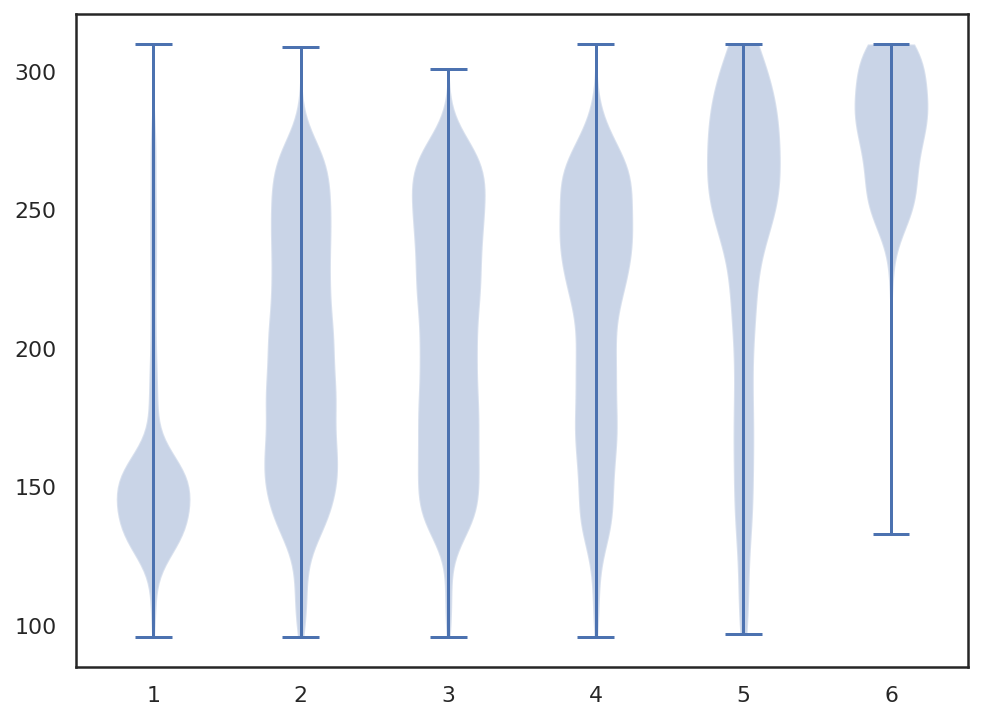

In [ ]:
# violin plot working hours distribution vs number of projects
pj2 = emp[emp["number_project"] == 2]["average_montly_hours"].values
pj3 = emp[emp["number_project"] == 3]["average_montly_hours"].values
pj4 = emp[emp["number_project"] == 4]["average_montly_hours"].values
pj5 = emp[emp["number_project"] == 5]["average_montly_hours"].values
pj6 = emp[emp["number_project"] == 6]["average_montly_hours"].values
pj7 = emp[emp["number_project"] == 7]["average_montly_hours"].values

fig, ax = plt.subplots(figsize=(8, 6))
ax.violinplot([pj2, pj3, pj4, pj5, pj6, pj7])
plt.show()